In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(recent_date)

# Calculate the date one year from the last date in data set.
one_year_from_recent = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(one_year_from_recent)

('2017-08-23',)
2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
yearprcp= session.query(measurement.date, func.avg(measurement.prcp)) \
.filter(measurement.date <= '2017-08-23') \
.filter(measurement.date >= '2016-08-23') \
.group_by(func.strftime('%m', measurement.date)) \
.all()

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
df =pd.DataFrame (yearprcp, columns = ['date','average precipitation'])
# Sort the dataframe by date
df.sort_values(by='date', ascending=True)
df.head()

date  average precipitation
0  2017-01-01               0.070294
1  2017-02-01               0.241111
2  2017-03-01               0.175266
3  2017-04-01               0.321111
4  2017-05-01               0.151317

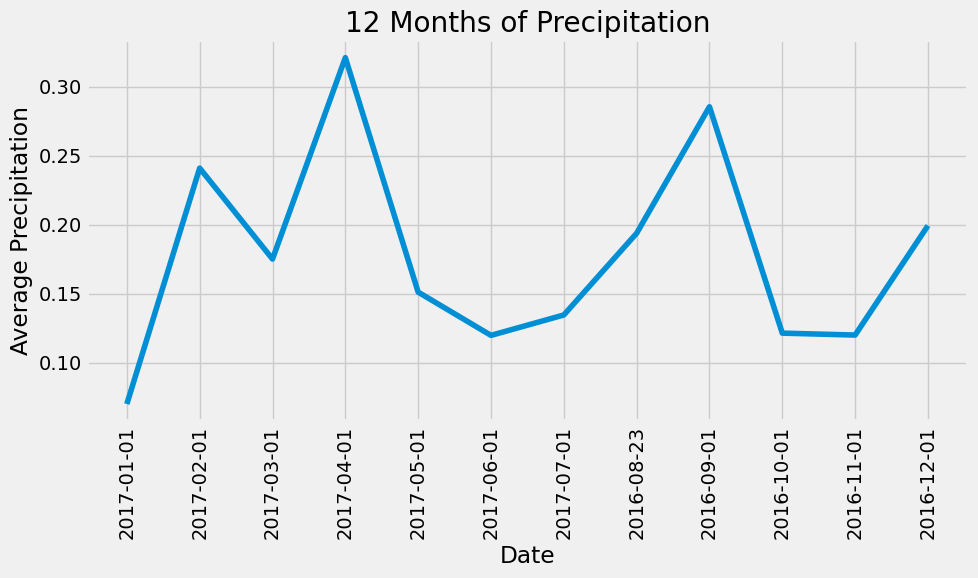

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['average precipitation'])
plt.title('12 Months of Precipitation')
plt.xlabel('Date')
plt.ylabel('Average Precipitation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df.describe)

<bound method NDFrame.describe of           date  average precipitation
0   2017-01-01               0.070294
1   2017-02-01               0.241111
2   2017-03-01               0.175266
3   2017-04-01               0.321111
4   2017-05-01               0.151317
5   2017-06-01               0.120000
6   2017-07-01               0.134773
7   2016-08-23               0.193955
8   2016-09-01               0.285549
9   2016-10-01               0.121620
10  2016-11-01               0.120234
11  2016-12-01               0.199494>


# Exploratory Station Analysis

In [14]:
station = 'measurement.station'
count = 0
unique_values = set()

In [15]:
# Design a query to calculate the total number of stations in the dataset
# station_count= session.query(func.count(station.station)).scalar()
# print(station_count)

for row in session.query(measurement.station):
    unique_values.add(row[0])
    if row [0] == station:
        count +=1

print(f"Number of unique values: {len(unique_values)}")

Number of unique values: 9


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
ordered_by_station = session.query(measurement.station, func.count(measurement.station))\
.group_by(measurement.station)\
.order_by(func.count(measurement.station).desc())\
.all()

for station, count in ordered_by_station:
    print(f" Station: {station}, Count: {count}")

 Station: USC00519281, Count: 2772
 Station: USC00519397, Count: 2724
 Station: USC00513117, Count: 2709
 Station: USC00519523, Count: 2669
 Station: USC00516128, Count: 2612
 Station: USC00514830, Count: 2202
 Station: USC00511918, Count: 1979
 Station: USC00517948, Count: 1372
 Station: USC00518838, Count: 511


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
highest_temp_station = session.query(func.max(measurement.tobs))\
.filter(measurement.station == 'USC00519281')\
.scalar()
lowest_temp_station = session.query(func.min(measurement.tobs))\
.filter(measurement.station == 'USC00519281')\
.scalar()
avg_temp_station = session.query(func.avg(measurement.tobs))\
.filter(measurement.station == 'USC00519281')\
.scalar()
print(f"Highest temperature at the USC00519281 station is {highest_temp_station}.")
print(f"Lowest temperature at the USC00519281 station is {lowest_temp_station}.")
print(f"Average temperature at the USC00519281 station is {avg_temp_station}.")

Highest temperature at the USC00519281 station is 85.0.
Lowest temperature at the USC00519281 station is 54.0.
Average temperature at the USC00519281 station is 71.66378066378067.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_station_temp= session.query(measurement.date, measurement.tobs) \
.filter(measurement.station == 'USC00519281')\
.filter(measurement.date <= '2017-08-23') \
.filter(measurement.date >= '2016-08-23') \
.order_by(func.strftime('%m', measurement.date)) \
.all()

df2 =pd.DataFrame (year_station_temp, columns = ['date','temperature'])

df2.sort_values(by='date', ascending=True)
df2

date  temperature
0    2017-01-01         72.0
1    2017-01-02         70.0
2    2017-01-03         64.0
3    2017-01-04         63.0
4    2017-01-05         63.0
..          ...          ...
347  2016-12-27         71.0
348  2016-12-28         72.0
349  2016-12-29         74.0
350  2016-12-30         69.0
351  2016-12-31         67.0

[352 rows x 2 columns]

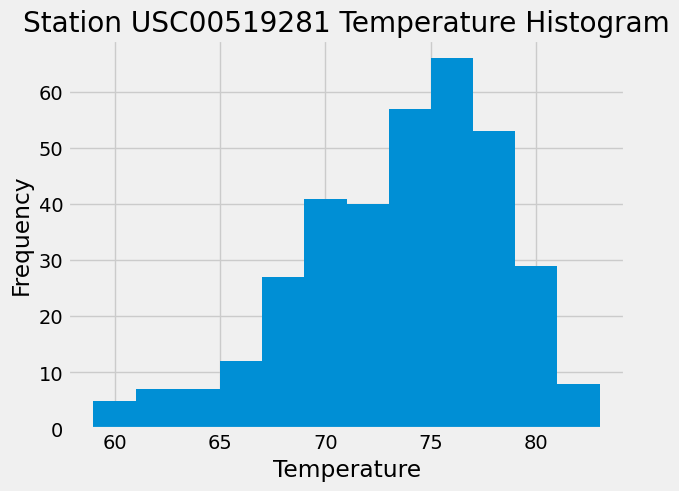

In [19]:
plt.hist(df2['temperature'], bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title ('Station USC00519281 Temperature Histogram')
plt.show()

# Close Session

In [20]:
session.commit

<bound method Session.commit of <sqlalchemy.orm.session.Session object at 0x0000021533A798B0>>

In [21]:
# Close Session
session.close()